# NYC Trip Duration Analysis

![](https://github.com/robinyUArizona/NYC-Taxi-Trip-Duration-R-ggplot2/blob/master/NYC-Taxi-Trip-Duration-Pic.PNG?raw=true)

**In this competition, we are asked to build a model to predict trip duration type for distance travelled, pickup time, geo-coordinates, number of passengers, and several other variables.**

In [1]:
#### New York Taxi trip duration ####

#### Libraries or Packages #####################################
# install.packages('vcd')
# install.packages('ggplot2')
# install.packages('geosphere')
# install.packages('lubridate')
# install.packages('e1071')
# install.packages('ggcorrplot')
# install.packages('caret')
# install.packages('gridExtra')
# install.packages('dplyr') 
# install.packages('mice')
# install.packages('VIM')
# install.packages('Boruta')
# install.packages('mlbench')
# install.packages('caret')
# install.packages('randomForest')
# install.packages("varImp")
# install.packages("party") 
# install.packages("ROSE")


In [2]:
options(warn=-1)

In [3]:
## load packages ###############################################
library(vcd) # for distribution plot
library(ggplot2) # for visualisation
library(geosphere) # for distance
library(lubridate) # for date-time formatting
library(e1071) # for naive bayes
library(ggcorrplot) # for correlation matrix plot
library(caret) # for confusion matrix
library(gridExtra) # for grid for multiplot
library(dplyr) # for %>%
library(mice) # for md.pattern()
library(VIM) # for visulaization of missing value

library(varImp) # for feature selection
library(party) # for feature selection
library(Boruta) # for feature selection
library(mlbench)
library(randomForest) # for feature selection
library(ROSE) # for ROC curve  
library(neuralnet) # for neural network
library(C50) # for decision tree

library(repr) # for plot margin
options(repr.plot.width=4, repr.plot.height=3)

Loading required package: grid

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: lattice

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind

Loading required package: colorspace
Loading required package: data.table

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

VIM is ready to use. 
 Since version 4.0.0 

In [4]:
################################################################
train_data <- read.csv('train.csv')
cat('Dimension of Train Data: \n')
print(dim(train_data))
print(summary(train_data))

Dimension of Train Data: 
[1] 1458644      11
         id            vendor_id                pickup_datetime   
 id0000001:      1   Min.   :1.000   2016-01-12 18:48:44:      5  
 id0000003:      1   1st Qu.:1.000   2016-02-09 21:03:38:      5  
 id0000005:      1   Median :2.000   2016-03-04 08:07:34:      5  
 id0000008:      1   Mean   :1.535   2016-04-05 18:55:21:      5  
 id0000009:      1   3rd Qu.:2.000   2016-05-07 13:18:07:      5  
 id0000011:      1   Max.   :2.000   2016-06-10 23:17:17:      5  
 (Other)  :1458638                   (Other)            :1458614  
            dropoff_datetime   passenger_count pickup_longitude 
 2016-02-19 19:25:04:      5   Min.   :0.000   Min.   :-121.93  
 2016-05-16 19:40:28:      5   1st Qu.:1.000   1st Qu.: -73.99  
 2016-01-07 08:04:32:      4   Median :1.000   Median : -73.98  
 2016-01-08 12:43:38:      4   Mean   :1.665   Mean   : -73.97  
 2016-01-08 13:00:41:      4   3rd Qu.:2.000   3rd Qu.: -73.97  
 2016-01-09 15:59:42:      4

In [5]:
# ##### check duplicate rows in train_data #######
# cat('Duplicate rows in train_data: ')
# print(train_data[duplicated(train_data)])
# ##-- Comment: No duplicate rows

In [6]:
# #### Exploring missing value in train_data ####
# cat('\n Exploring missing value in train_data: \n')

# ## Check for missing value "NA"
# cat('Check for missing value: \n')
# print(sum(is.na(train_data)))
# cat('check missing value in each column: \n')
# print(colSums(is.na(train_data)))

# ## Distribution of missing value
# print(md.pattern(train_data))
# ##-- comment: No missing values

In [7]:
### train_data without missing rows -- complete case
train_data <- na.omit(train_data)

set.seed(123)
sample_size <- 50000 
sample_train_data <- train_data[sample(nrow(train_data), size=sample_size,
                            replace=FALSE), ]

## Save sample_train_data as 'sample_train.csv' file
write.csv(sample_train_data, "sample_train.csv", row.names = FALSE)

#####################################################################

In [8]:
## Sample_train.csv
new_train_data <- read.csv('sample_train.csv')
new_train_data <- as_data_frame(new_train_data)

cat('Dimension of Sample Train Data: \n')
print(dim(new_train_data))
cat('\n\nColumn Names: \n')
print(colnames(new_train_data))

# Summary of data
cat('Summary of New Train Data: \n')
print(summary(new_train_data))
cat('\n\nOriginal Data Format: \n')
print(str(new_train_data))

head(new_train_data)

Dimension of Sample Train Data: 
[1] 50000    11


Column Names: 
 [1] "id"                 "vendor_id"          "pickup_datetime"   
 [4] "dropoff_datetime"   "passenger_count"    "pickup_longitude"  
 [7] "pickup_latitude"    "dropoff_longitude"  "dropoff_latitude"  
[10] "store_and_fwd_flag" "trip_duration"     
Summary of New Train Data: 
         id          vendor_id                pickup_datetime 
 id0000107:    1   Min.   :1.000   2016-01-03 16:22:04:    2  
 id0000186:    1   1st Qu.:1.000   2016-01-10 01:22:15:    2  
 id0000278:    1   Median :2.000   2016-01-16 01:03:42:    2  
 id0000334:    1   Mean   :1.535   2016-01-21 22:40:59:    2  
 id0000337:    1   3rd Qu.:2.000   2016-01-22 05:16:58:    2  
 id0000375:    1   Max.   :2.000   2016-01-29 13:17:16:    2  
 (Other)  :49994                   (Other)            :49988  
            dropoff_datetime passenger_count pickup_longitude pickup_latitude
 2016-01-04 11:05:55:    2   Min.   :0.000   Min.   :-75.46   Min.   :39.

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
id2826034,1,2016-06-09 08:28:09,2016-06-09 08:45:23,1,-73.99175,40.74547,-73.97902,40.76099,N,1034
id0486626,1,2016-04-04 13:25:16,2016-04-04 13:32:18,4,-73.98820,40.74594,-74.00010,40.73305,N,422
id3953928,2,2016-02-19 00:51:25,2016-02-19 00:52:58,1,-73.96552,40.80609,-73.96155,40.80202,N,93
id3925513,2,2016-04-11 17:48:22,2016-04-11 18:13:40,1,-73.97545,40.75371,-73.97767,40.77701,N,1518
id3176117,1,2016-02-13 13:48:27,2016-02-13 13:57:19,1,-73.95798,40.78236,-73.96026,40.76311,N,532
id1997857,1,2016-04-12 22:26:39,2016-04-12 22:31:42,1,-73.95249,40.78394,-73.94897,40.77415,N,303


In [9]:
sapply(new_train_data, class)

id          vendor_id    pickup_datetime   dropoff_datetime 
          "factor"          "integer"           "factor"           "factor" 
   passenger_count   pickup_longitude    pickup_latitude  dropoff_longitude 
         "integer"          "numeric"          "numeric"          "numeric" 
  dropoff_latitude store_and_fwd_flag      trip_duration 
         "numeric"           "factor"          "integer"


Exploring missing value in train_data: 
Check for missing value: 
[1] 0
check missing value in each column: 
                id          vendor_id    pickup_datetime   dropoff_datetime 
                 0                  0                  0                  0 
   passenger_count   pickup_longitude    pickup_latitude  dropoff_longitude 
                 0                  0                  0                  0 
  dropoff_latitude store_and_fwd_flag      trip_duration 
                 0                  0                  0 

 Missings in variables:
[1] Variable Count   
<0 rows> (or 0-length row.names)

 Missings in variables:
[1] Variable Count   
<0 rows> (or 0-length row.names)


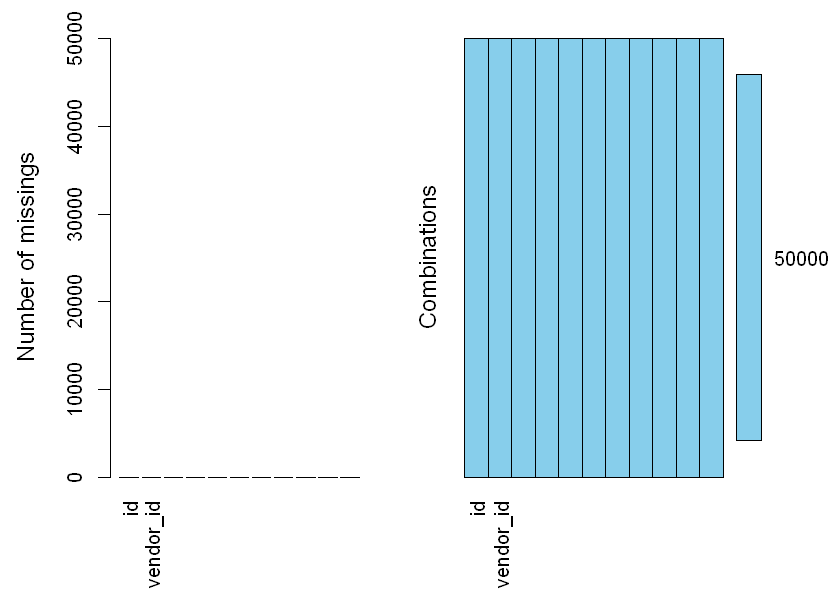

In [10]:
##### check duplicate rows in sample_train_data #######
# cat('Duplicate rows in train_data: \n')
# print(new_train_data[duplicated(new_train_data)])

#-- Comment: No duplicate rows

#### Exploring missing value in train_data ####
cat('\nExploring missing value in train_data: \n')

## Check for missing value "NA"
cat('Check for missing value: \n')
print(sum(is.na(new_train_data)))
cat('check missing value in each column: \n')
print(colSums(is.na(new_train_data)))

# Visualization of missing value
#  call function aggr (), prop = FALSE convert percentage value into counts
# Function aggr() returns a bar-chart and a heat-map showing the distribution of missing value
options(repr.plot.width = 4, repr.plot.height = 3)
print(aggr(new_train_data, prop = FALSE, numbers = TRUE))

##-- comment: No missing values


### train_data without missing rows -- complete case
## no need for this step
new_train_data <- na.omit(new_train_data)


# Function aggr() returns a bar-chart and a heat-map showing the distribution of missing value
options(repr.plot.width = 7, repr.plot.height = 5)
print(aggr(new_train_data, prop = FALSE, numbers = TRUE))

In [11]:
## formatting target variable 'trip_duration'
# Dr. Zhang suggestion comment, "Since we mainly use classification-
# methods, I suggest you convert your Ride Duration to Long/Short."

############## Summary for target variable "trip_duration"
summary_trip_duration <- summary(new_train_data$trip_duration)
print(summary_trip_duration)
median_trip_duration <- summary_trip_duration['Median']
max_trip_duration <- summary_trip_duration['Max.']
cat('Median of trip_duration in Seconds: \n')
print(median_trip_duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   398.0   662.0   933.4  1075.0 86358.0 
Median of trip_duration in Seconds: 
Median 
   662 


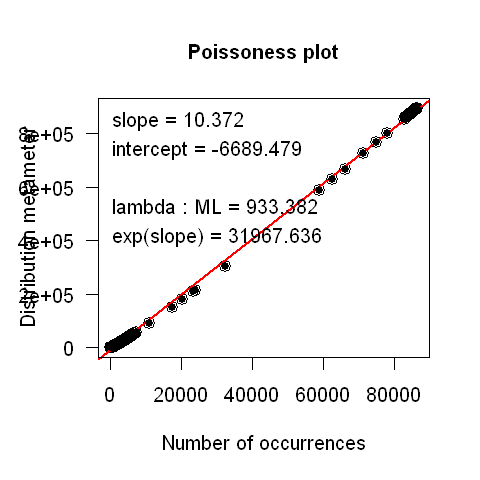

In [12]:
#### Some plots to decide where to cutoff for short and long -- 'trip_duration' ####
# distribution plot
options(repr.plot.width = 4, repr.plot.height = 4)
distplot(new_train_data$trip_duration)

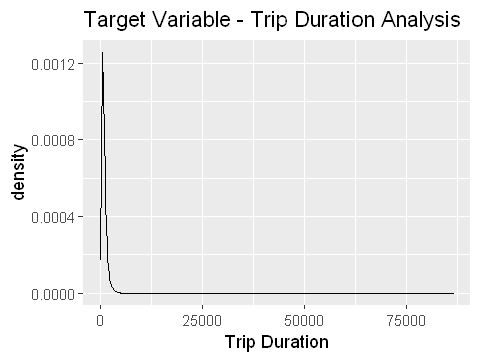

In [13]:
# density plot
options(repr.plot.width = 4, repr.plot.height = 3)
dens_dist <- ggplot(new_train_data, aes(x=trip_duration)) +
  geom_density() + 
  ggtitle("Target Variable - Trip Duration Analysis") +
  xlab("Trip Duration") +
  theme(legend.position="none")
dens_dist

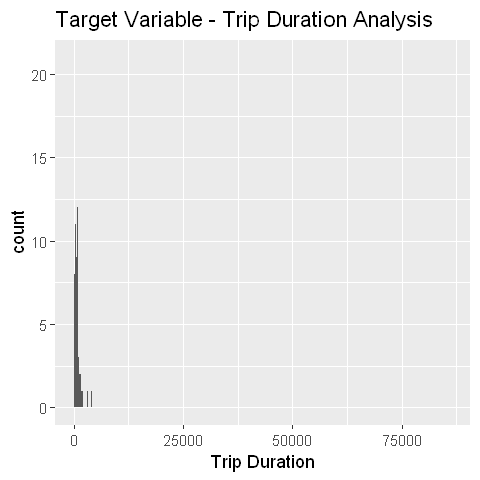

In [14]:
# histogram 
options(repr.plot.width = 4, repr.plot.height = 4)
new_train_data %>%
    sample_frac(size = 0.05) %>%
    ggplot() +
    geom_histogram(aes(trip_duration), binwidth = 5) +
    ggtitle("Target Variable - Trip Duration Analysis") +
    xlab("Trip Duration") +
    theme(legend.position="none")

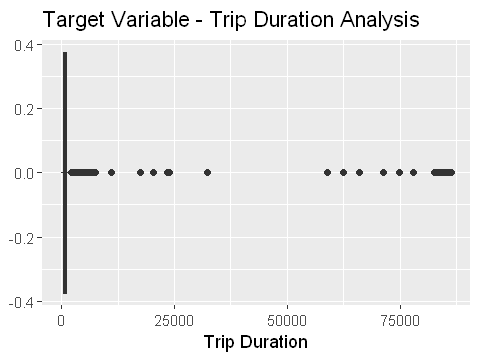

In [15]:
# boxplot
options(repr.plot.width = 4, repr.plot.height = 3)
box_dist <- ggplot(data = new_train_data, aes(x=trip_duration)) +
               geom_boxplot() +
               ggtitle("Target Variable - Trip Duration Analysis") +
               xlab("Trip Duration") +
               theme(legend.position="none")
box_dist

In [16]:
#### Regression problem to Classification problem #####################
cat('\n Changing regression problem to classification problem: \n')
# Assuming trip duration more than 30 minutes is long trip --> 1800 seconds
new_train_data$trip_duration <- cut(new_train_data$trip_duration,
                                    breaks=c(0, 1800, max_trip_duration),
                                    labels=c("Short Trip","Long Trip"))

# changing target variable to factor
new_train_data$trip_duration <- as.factor(new_train_data$trip_duration)



 Changing regression problem to classification problem: 


Short Trip  Long Trip 
     46191       3809 


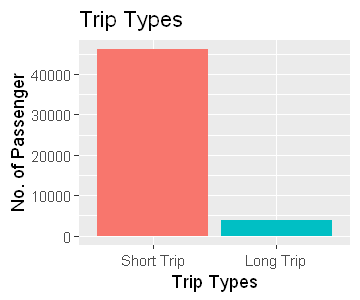

In [17]:
## Analysis of target variable 
# 'trip_duration - short and long trip' feature
## count the number of "Short Trip" and "Long Trip"
print(summary(new_train_data$trip_duration))

# print(str(new_train_data))

trip <- new_train_data %>%
  group_by(trip_duration) %>%
  count() 

options(repr.plot.width = 3, repr.plot.height = 2.5)
trip %>% ggplot(aes(x=factor(trip_duration), y=n))+
  geom_col(aes(fill = factor(trip_duration))) +
  ggtitle("Trip Types") +
  xlab("Trip Types") +
  ylab("No. of Passenger") +
  theme(legend.position = "none")

In [18]:
## baseline accuracy
# Assuming my model will classify all of my observations according to majority class
num_short_trip <- summary(new_train_data$trip_duration)['Short Trip']
num_short_trip
num_long_trip <- summary(new_train_data$trip_duration)['Long Trip']
num_long_trip

base_accuracy <- (num_short_trip / (num_short_trip + num_long_trip)) * 100
cat('Base-line accuracy based on majority class: ')
print(base_accuracy)

Short Trip 
     46191

Long Trip 
     3809

Base-line accuracy based on majority class: Short Trip 
    92.382 


In [19]:
### Lets check dataset
head(new_train_data)
print(str(new_train_data))
print(summary(new_train_data))

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
<fct>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
id2826034,1,2016-06-09 08:28:09,2016-06-09 08:45:23,1,-73.99175,40.74547,-73.97902,40.76099,N,Short Trip
id0486626,1,2016-04-04 13:25:16,2016-04-04 13:32:18,4,-73.98820,40.74594,-74.00010,40.73305,N,Short Trip
id3953928,2,2016-02-19 00:51:25,2016-02-19 00:52:58,1,-73.96552,40.80609,-73.96155,40.80202,N,Short Trip
id3925513,2,2016-04-11 17:48:22,2016-04-11 18:13:40,1,-73.97545,40.75371,-73.97767,40.77701,N,Short Trip
id3176117,1,2016-02-13 13:48:27,2016-02-13 13:57:19,1,-73.95798,40.78236,-73.96026,40.76311,N,Short Trip
id1997857,1,2016-04-12 22:26:39,2016-04-12 22:31:42,1,-73.95249,40.78394,-73.94897,40.77415,N,Short Trip


Classes 'tbl_df', 'tbl' and 'data.frame':	50000 obs. of  11 variables:
 $ id                : Factor w/ 50000 levels "id0000107","id0000186",..: 35480 6156 49420 49073 39750 25071 41839 37978 34187 47206 ...
 $ vendor_id         : int  1 1 2 2 1 1 1 2 1 2 ...
 $ pickup_datetime   : Factor w/ 49904 levels "2016-01-01 00:06:56",..: 44191 25850 12911 27995 11304 28356 30862 12288 20840 14847 ...
 $ dropoff_datetime  : Factor w/ 49907 levels "2016-01-01 00:21:17",..: 44191 25851 12902 28001 11299 28360 30862 12278 20844 14841 ...
 $ passenger_count   : int  1 4 1 1 1 1 1 2 1 1 ...
 $ pickup_longitude  : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num  40.7 40.7 40.8 40.8 40.8 ...
 $ dropoff_longitude : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude  : num  40.8 40.7 40.8 40.8 40.8 ...
 $ store_and_fwd_flag: Factor w/ 2 levels "N","Y": 1 1 1 1 1 1 1 1 1 1 ...
 $ trip_duration     : Factor w/ 2 levels "Short Trip","Long Trip": 1 1 1 1 1 1 1 1 1 1 ...
NULL
         id          vendo

## Exploration of datasets

### Analysis of Independent Features

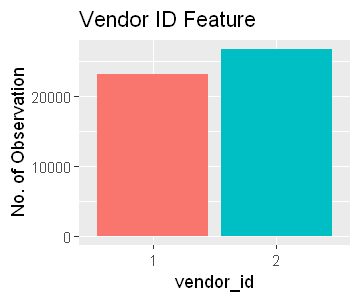

In [20]:
# 'vender_id' feature
vendorID <- new_train_data %>%
  group_by(vendor_id) %>%
  count() 

options(repr.plot.width = 3, repr.plot.height = 2.5)
vendorID %>% ggplot(aes(x=factor(vendor_id), y=n))+
  geom_col(aes(fill = factor(vendor_id))) +
  ggtitle("Vendor ID Feature") +
  xlab("vendor_id") +
  ylab("No. of Observation") +
  theme(legend.position = "none")

In [21]:
#### Formatting Features: #####################################################
##  “store_and_fwd_flag” variable to numeric, from character.
new_train_data$store_and_fwd_flag <- as.numeric(as.factor(new_train_data$store_and_fwd_flag))
# print(str(new_train_data))

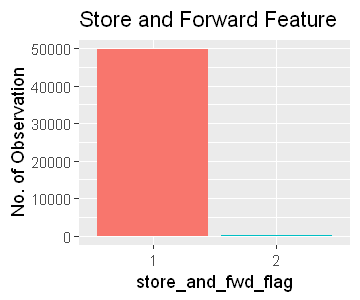

In [22]:
# 'store_and_fwd_flag' feature
store_flag <- new_train_data %>%
  group_by(store_and_fwd_flag) %>%
  count()

options(repr.plot.width = 3, repr.plot.height = 2.5)
store_flag %>% ggplot(aes(x=factor(store_and_fwd_flag), y=n))+
  geom_col(aes(fill = factor(store_and_fwd_flag))) +
  ggtitle("Store and Forward Feature") +
  xlab("store_and_fwd_flag") +
  ylab("No. of Observation") +
  theme(legend.position = "none")


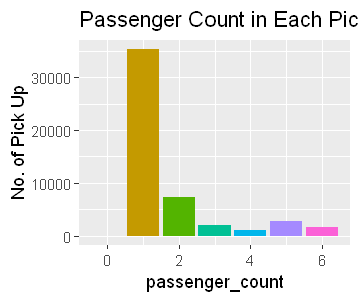

In [23]:
# 'passenger_count' feature
passeng_count <- new_train_data %>%
  group_by(passenger_count) %>%
  count() 

options(repr.plot.width = 3, repr.plot.height = 2.5)
passeng_count %>% ggplot(aes(x=passenger_count, y=n))+
  geom_col(aes(fill = factor(passenger_count)))+
  ggtitle("Passenger Count in Each Pick Up") +
  xlab("passenger_count") +
  ylab("No. of Pick Up") +
  theme(legend.position = "none")

In [24]:
###### Distance ####################################################
## 'Distance Travelled during each Trip' using
# 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude' features

i  <- cbind(pick_longitude = new_train_data$pickup_longitude,
            pick_latitude = new_train_data$pickup_latitude)
j <- cbind(drop_longitude = new_train_data$dropoff_longitude,
           drop_latitude = new_train_data$dropoff_latitude)

## computing haversine distance from co-ordinates
# distance column is added at the end
new_train_data$distance <- distHaversine(i, j)

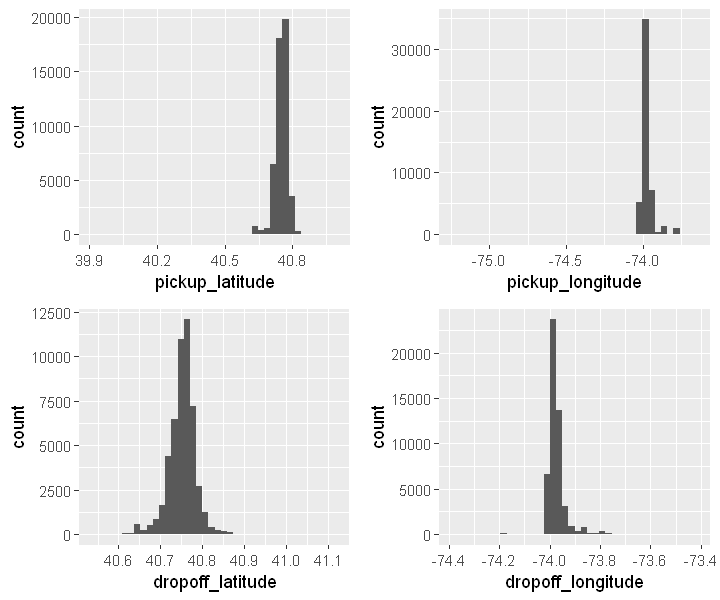

In [25]:
# 'pickup_latitude', pickup_longitude', dropoff_latitude', 'dropoff_longitude' features
options(repr.plot.width = 6, repr.plot.height = 5)
p1 <- new_train_data %>%
  filter(pickup_latitude > min(new_train_data$pickup_latitude) &
          pickup_latitude < max(new_train_data$pickup_latitude)) %>%
  ggplot(aes(x=pickup_latitude)) +
  geom_histogram(bins=40)

p2 <- new_train_data %>%
  filter(pickup_longitude > min(new_train_data$pickup_longitude) &
           pickup_longitude < max(new_train_data$pickup_longitude)) %>%
  ggplot(aes(x=pickup_longitude)) +
  geom_histogram(bins=40)

p3 <- new_train_data %>%
  filter(dropoff_latitude > min(new_train_data$dropoff_latitude) &
           dropoff_latitude < max(new_train_data$dropoff_latitude)) %>%
  ggplot(aes(x=dropoff_latitude)) +
  geom_histogram(bins=40)

p4 <- new_train_data %>%
  filter(dropoff_longitude > min(new_train_data$dropoff_longitude) &
           dropoff_longitude < max(new_train_data$dropoff_longitude)) %>%
  ggplot(aes(x=dropoff_longitude)) +
  geom_histogram(bins=40)

grid.arrange(p1, p2, p3, p4)

In [26]:
## 'pickup_datetime' and 'dropoff_datetime'
# convert 'Factor' into 'data/time' data type
new_train_data$pickup_datetime <- ymd_hms(new_train_data$pickup_datetime)
new_train_data$dropoff_datetime <- ymd_hms(new_train_data$dropoff_datetime)

new_train_data$pickup_month <- month(new_train_data$pickup_datetime)
new_train_data$pickup_day <- day(new_train_data$pickup_datetime)
new_train_data$pickup_hour <- hour(new_train_data$pickup_datetime)
new_train_data$pickup_minutes <- minute(new_train_data$pickup_datetime)


new_train_data$pickup_week <- week(new_train_data$pickup_datetime)
new_train_data$pickup_weekdays <- wday(new_train_data$pickup_datetime)
new_train_data$pickup_weekend <- ifelse(new_train_data$pickup_weekdays==6 | new_train_data$pickup_weekdays==7,
                               "Weekend","not-Weekend")

new_train_data$pickup_weekend <- as.factor(new_train_data$pickup_weekend)
print(str(new_train_data))
print(summary(new_train_data$pickup_weekend))


Classes 'tbl_df', 'tbl' and 'data.frame':	50000 obs. of  19 variables:
 $ id                : Factor w/ 50000 levels "id0000107","id0000186",..: 35480 6156 49420 49073 39750 25071 41839 37978 34187 47206 ...
 $ vendor_id         : int  1 1 2 2 1 1 1 2 1 2 ...
 $ pickup_datetime   : POSIXct, format: "2016-06-09 08:28:09" "2016-04-04 13:25:16" ...
 $ dropoff_datetime  : POSIXct, format: "2016-06-09 08:45:23" "2016-04-04 13:32:18" ...
 $ passenger_count   : int  1 4 1 1 1 1 1 2 1 1 ...
 $ pickup_longitude  : num  -74 -74 -74 -74 -74 ...
 $ pickup_latitude   : num  40.7 40.7 40.8 40.8 40.8 ...
 $ dropoff_longitude : num  -74 -74 -74 -74 -74 ...
 $ dropoff_latitude  : num  40.8 40.7 40.8 40.8 40.8 ...
 $ store_and_fwd_flag: num  1 1 1 1 1 1 1 1 1 1 ...
 $ trip_duration     : Factor w/ 2 levels "Short Trip","Long Trip": 1 1 1 1 1 1 1 1 1 1 ...
 $ distance          : num  2034 1751 563 2601 2152 ...
 $ pickup_month      : int  6 4 2 4 2 4 4 2 3 2 ...
 $ pickup_day        : int  9 4 19 11 13 1

In [27]:
head(new_train_data)

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_month,pickup_day,pickup_hour,pickup_minutes,pickup_week,pickup_weekdays,pickup_weekend
<fct>,<int>,<dttm>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
id2826034,1,2016-06-09 08:28:09,2016-06-09 08:45:23,1,-73.99175,40.74547,-73.97902,40.76099,1,Short Trip,2034.3679,6,9,8,28,24,5,not-Weekend
id0486626,1,2016-04-04 13:25:16,2016-04-04 13:32:18,4,-73.98820,40.74594,-74.00010,40.73305,1,Short Trip,1751.1668,4,4,13,25,14,2,not-Weekend
id3953928,2,2016-02-19 00:51:25,2016-02-19 00:52:58,1,-73.96552,40.80609,-73.96155,40.80202,1,Short Trip,563.4582,2,19,0,51,8,6,Weekend
id3925513,2,2016-04-11 17:48:22,2016-04-11 18:13:40,1,-73.97545,40.75371,-73.97767,40.77701,1,Short Trip,2600.5088,4,11,17,48,15,2,not-Weekend
id3176117,1,2016-02-13 13:48:27,2016-02-13 13:57:19,1,-73.95798,40.78236,-73.96026,40.76311,1,Short Trip,2151.7627,2,13,13,48,7,7,Weekend
id1997857,1,2016-04-12 22:26:39,2016-04-12 22:31:42,1,-73.95249,40.78394,-73.94897,40.77415,1,Short Trip,1130.2542,4,12,22,26,15,3,not-Weekend


In [28]:
# install.packages('RColorBrewer')
library(RColorBrewer)

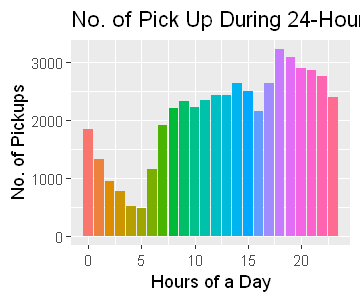

In [29]:
# 'Number of Pickup' in 24-Hours
num_pickup_24 <- new_train_data %>%
  group_by(pickup_hour) %>%
  count()

options(repr.plot.width = 3, repr.plot.height = 2.5)
num_pickup_24 %>%
  ggplot(aes(x=pickup_hour, y=n)) +
  geom_col(aes(fill = factor(pickup_hour))) +
  ggtitle("No. of Pick Up During 24-Hours") +
  xlab("Hours of a Day") +
  ylab("No. of Pickups") +
  theme(legend.position = "none") +
  scale_color_brewer(palette="Dark1")


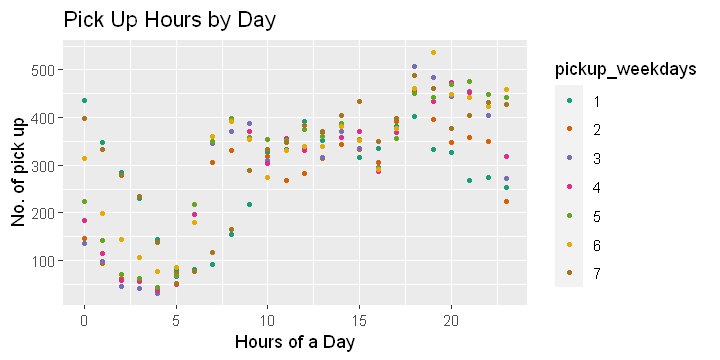

In [30]:
##### 'pickup_datetime' feature
num_pickup_24hours_day <- new_train_data %>%
  group_by(pickup_hour, pickup_weekdays) %>%
  count()

options(repr.plot.width = 6, repr.plot.height = 3)
num_pickup_24hours_day %>% ggplot(aes(x=pickup_hour, y=n, color= pickup_weekdays)) +
  geom_point(size=1, aes(color = factor(pickup_weekdays))) +
  ggtitle("Pick Up Hours by Day") +
  xlab("Hours of a Day") +
  ylab("No. of pick up") +
  scale_color_brewer(palette="Dark2")

## Sunday is '1'

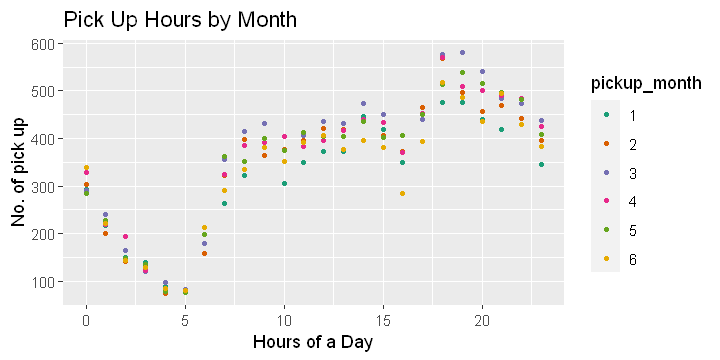

In [31]:
num_pickup_24hours_month <- new_train_data %>%
  group_by(pickup_hour, pickup_month) %>%
  count()

options(repr.plot.width = 6, repr.plot.height = 3)
num_pickup_24hours_month %>% ggplot(aes(x=pickup_hour, y=n, color=pickup_month)) +
  geom_point(size=1, aes(color = factor(pickup_month))) +
  ggtitle("Pick Up Hours by Month") +
  xlab("Hours of a Day") +
  ylab("No. of pick up") + 
  scale_color_brewer(palette="Dark2")


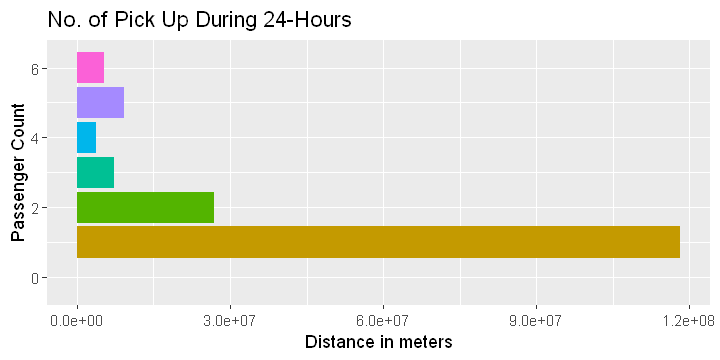

In [32]:
## Realtionship between distance vs. passenger count
# This is important--> By intuition distance should increase with passenger count

ggplot(new_train_data, aes(distance, passenger_count)) + 
geom_col(aes(fill = factor(passenger_count))) +
ggtitle("No. of Pick Up During 24-Hours") +
  xlab("Distance in meters") +
  ylab("Passenger Count") +
  theme(legend.position = "none") 

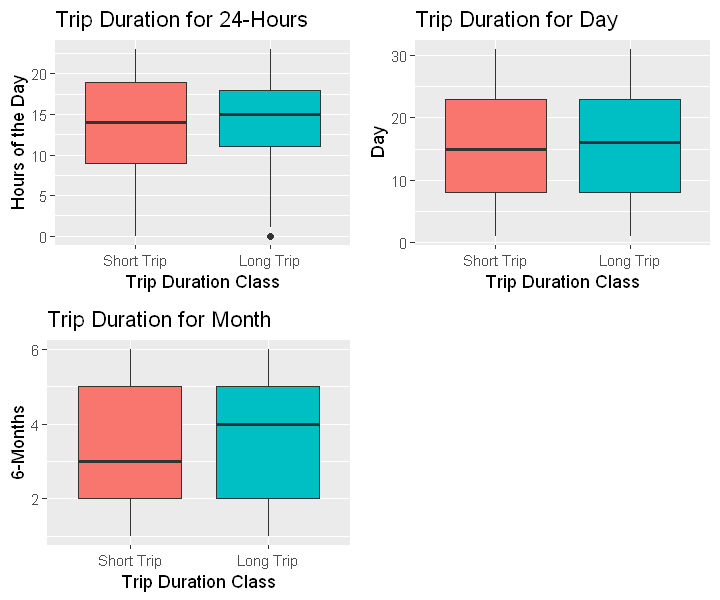

In [33]:
## Visualization after changing time format "pickup_datetime", "dropoff_datetime"

## Relationship between "pickup_datetime", "dropoff_datetime" with 'trip_duration'
options(repr.plot.width = 6, repr.plot.height = 5)
b1 <- ggplot(data = new_train_data,
             aes(x=trip_duration, y=pickup_hour,
                 fill=trip_duration)) +
  geom_boxplot() +
  ggtitle("Trip Duration for 24-Hours") +
  xlab("Trip Duration Class") +
  ylab("Hours of the Day") +
  theme(legend.position="none")

b2 <- ggplot(data = new_train_data,
             aes(x=trip_duration, y=pickup_day,
                 fill=trip_duration)) +
  geom_boxplot() +
  ggtitle("Trip Duration for Day") +
  xlab("Trip Duration Class") +
  ylab("Day") +
  theme(legend.position="none")

b3 <- ggplot(data = new_train_data,
             aes(x=trip_duration, y=pickup_month,
                 fill=trip_duration)) +
  geom_boxplot() +
  ggtitle("Trip Duration for Month") +
  xlab("Trip Duration Class") +
  ylab("6-Months") +
  theme(legend.position="none")

grid.arrange(b1, b2, b3, ncol=2)

In [34]:
head(new_train_data)

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_month,pickup_day,pickup_hour,pickup_minutes,pickup_week,pickup_weekdays,pickup_weekend
<fct>,<int>,<dttm>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
id2826034,1,2016-06-09 08:28:09,2016-06-09 08:45:23,1,-73.99175,40.74547,-73.97902,40.76099,1,Short Trip,2034.3679,6,9,8,28,24,5,not-Weekend
id0486626,1,2016-04-04 13:25:16,2016-04-04 13:32:18,4,-73.98820,40.74594,-74.00010,40.73305,1,Short Trip,1751.1668,4,4,13,25,14,2,not-Weekend
id3953928,2,2016-02-19 00:51:25,2016-02-19 00:52:58,1,-73.96552,40.80609,-73.96155,40.80202,1,Short Trip,563.4582,2,19,0,51,8,6,Weekend
id3925513,2,2016-04-11 17:48:22,2016-04-11 18:13:40,1,-73.97545,40.75371,-73.97767,40.77701,1,Short Trip,2600.5088,4,11,17,48,15,2,not-Weekend
id3176117,1,2016-02-13 13:48:27,2016-02-13 13:57:19,1,-73.95798,40.78236,-73.96026,40.76311,1,Short Trip,2151.7627,2,13,13,48,7,7,Weekend
id1997857,1,2016-04-12 22:26:39,2016-04-12 22:31:42,1,-73.95249,40.78394,-73.94897,40.77415,1,Short Trip,1130.2542,4,12,22,26,15,3,not-Weekend


In [35]:
colnames(new_train_data)

[1] "id"                 "vendor_id"          "pickup_datetime"   
 [4] "dropoff_datetime"   "passenger_count"    "pickup_longitude"  
 [7] "pickup_latitude"    "dropoff_longitude"  "dropoff_latitude"  
[10] "store_and_fwd_flag" "trip_duration"      "distance"          
[13] "pickup_month"       "pickup_day"         "pickup_hour"       
[16] "pickup_minutes"     "pickup_week"        "pickup_weekdays"   
[19] "pickup_weekend"

In [36]:
## Lets select attriutes which is important
##### Cleaning Data ############
## Selecting columns or attributes which does not contribute to model learning

## removing "id", "pickup_datetime", "dropoff_datetime", "pickup_longitude", "pickup_latitude", 
## "dropoff_latitude", "dropoff_longitude", "store_and_fwd_flag"
train_data <- new_train_data[, -which(names(new_train_data) 
                                          %in% c("id", "pickup_datetime", "dropoff_datetime", 
                                                 "pickup_longitude", "pickup_latitude", 
                                                 "dropoff_latitude", "dropoff_longitude", 
                                                 "store_and_fwd_flag", "pickup_weekend")) ]

cat("\n After Removal of irrelevant attributes: \n")
print(colnames(train_data))
head(train_data)


 After Removal of irrelevant attributes: 
 [1] "vendor_id"       "passenger_count" "trip_duration"   "distance"       
 [5] "pickup_month"    "pickup_day"      "pickup_hour"     "pickup_minutes" 
 [9] "pickup_week"     "pickup_weekdays"


vendor_id,passenger_count,trip_duration,distance,pickup_month,pickup_day,pickup_hour,pickup_minutes,pickup_week,pickup_weekdays
<int>,<int>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Short Trip,2034.3679,6,9,8,28,24,5
1,4,Short Trip,1751.1668,4,4,13,25,14,2
2,1,Short Trip,563.4582,2,19,0,51,8,6
2,1,Short Trip,2600.5088,4,11,17,48,15,2
1,1,Short Trip,2151.7627,2,13,13,48,7,7
1,1,Short Trip,1130.2542,4,12,22,26,15,3


Classes 'tbl_df', 'tbl' and 'data.frame':	50000 obs. of  10 variables:
 $ vendor_id      : int  1 1 2 2 1 1 1 2 1 2 ...
 $ passenger_count: int  1 4 1 1 1 1 1 2 1 1 ...
 $ trip_duration  : Factor w/ 2 levels "Short Trip","Long Trip": 1 1 1 1 1 1 1 1 1 1 ...
 $ distance       : num  2034 1751 563 2601 2152 ...
 $ pickup_month   : int  6 4 2 4 2 4 4 2 3 2 ...
 $ pickup_day     : int  9 4 19 11 13 12 21 16 17 25 ...
 $ pickup_hour    : int  8 13 0 17 13 22 18 23 21 21 ...
 $ pickup_minutes : int  28 25 51 48 48 26 42 19 25 10 ...
 $ pickup_week    : int  24 14 8 15 7 15 17 7 12 9 ...
 $ pickup_weekdays: int  5 2 6 2 7 3 5 3 5 5 ...
NULL


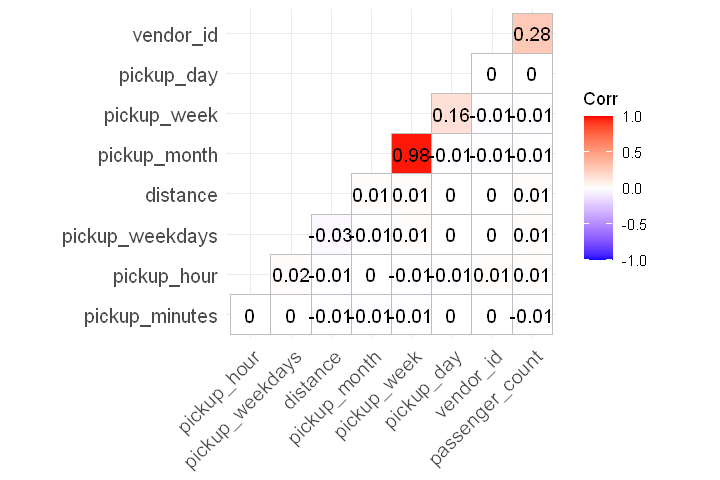

In [37]:
### Correlation Matrix & Correlation Plot####
print(str(train_data))

corr_data <- train_data[, which(names(train_data)
                                    %in% c("vendor_id", "passenger_count", "distance",
                                           "pickup_month", "pickup_day", "pickup_hour", 
                                           "pickup_minutes", "pickup_week", "pickup_weekdays"))]

corr_matrix <- round(cor(corr_data), 4)
# print(corr_matrix)

options(repr.plot.width = 6, repr.plot.height = 4)
ggcorrplot(corr_matrix, hc.order = TRUE, type = "lower", lab = TRUE)

## Train & Test Split

In [38]:
# 70 % train_data
# set.seed(123)
sample_size <- floor(0.7 * nrow(train_data))

# randomly select index of observations for training
# training_index <- sample(nrow(train_data), size=sample_size, replace=FALSE)
# train <- train_data[training_index, ]
# print(head(train))
# test <- train_data[-training_index, ]
# print(head(test))

# install.packages('caret')

library(caret)
train.index <- createDataPartition(train_data$trip_duration, p = .7, list = FALSE)
train <- train_data[ train.index,]
test  <- train_data[-train.index,]



print(table(train$trip_duration))
print(table(test$trip_duration))
print(dim(train))
print(dim(test))


Short Trip  Long Trip 
     32334       2667 

Short Trip  Long Trip 
     13857       1142 
[1] 35001    10
[1] 14999    10


3rd Qu. 
3799.11 
 3rd Qu. 
7664.653 


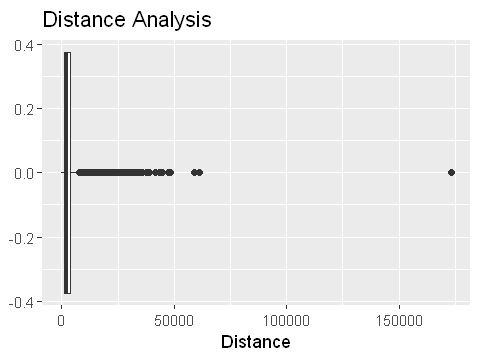

In [39]:
## Analyze the distance feature
# boxplot
options(repr.plot.width = 4, repr.plot.height = 3)
box_distance <- ggplot(data = train, aes(x=distance)) +
               geom_boxplot() +
               ggtitle("Distance Analysis") +
               xlab("Distance") +
               theme(legend.position="none")
box_distance 

sum_distance <- summary(train$distance)
third_Q <- sum_distance['3rd Qu.']
print(third_Q)
bench <- third_Q + (1.5* IQR(train$distance))
print(bench)



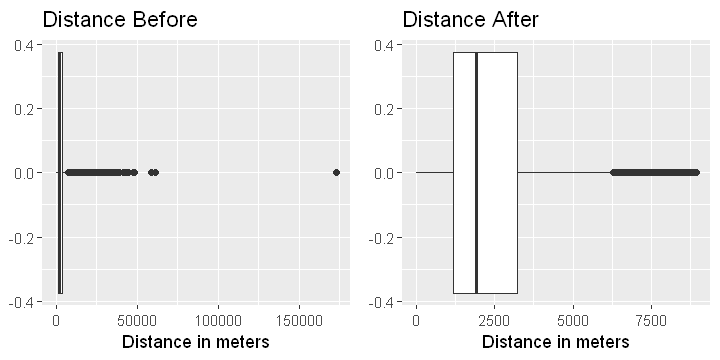

In [40]:
remove_outliers <- function(x, na.rm = TRUE, ...) {
  qnt <- quantile(x, probs=c(.25, .75), na.rm = na.rm, ...)
  H <- 2 * IQR(x, na.rm = na.rm)
  y <- x
  y[x < (qnt[1] - H)] <- NA
  y[x > (qnt[2] + H)] <- NA
  y
}
y1 <- remove_outliers(train$distance)
y2 <- remove_outliers(test$distance)

## png()
par(mfrow = c(1, 2))

options(repr.plot.width = 6, repr.plot.height = 3)
box_dis1 <- ggplot(data = train, aes(x=distance)) +
               geom_boxplot() +
               ggtitle("Distance Before") +
               xlab("Distance in meters") +
               theme(legend.position="none")

box_dis2 <- ggplot(data = train, aes(x=y1)) +
               geom_boxplot() +
               ggtitle("Distance After") +
               xlab("Distance in meters") +
               theme(legend.position="none")


grid.arrange(box_dis1, box_dis2, ncol=2)

## dev.off()


In [41]:
train$distance <- y1
test$distance <- y2

## remove NA from both train and test
# ## Check for missing value "NA"
cat('Check for missing value: \n')
print(sum(is.na(train)))
print(sum(is.na(test)))

# we can retain observation thta do not conatain NA(null) value
train <- na.omit(train)
print(head(train))
test <- na.omit(test)
print(head(test))

Check for missing value: 
[1] 2714
[1] 1124
# A tibble: 6 x 10
  vendor_id passenger_count trip_duration distance pickup_month pickup_day
      <int>           <int> <fct>            <dbl>        <int>      <int>
1         1               1 Short Trip       2034.            6          9
2         2               1 Short Trip        563.            2         19
3         2               1 Short Trip       2601.            4         11
4         1               1 Short Trip       2152.            2         13
5         1               1 Short Trip       1130.            4         12
6         1               1 Short Trip        513.            4         21
# ... with 4 more variables: pickup_hour <int>, pickup_minutes <int>,
#   pickup_week <int>, pickup_weekdays <int>
# A tibble: 6 x 10
  vendor_id passenger_count trip_duration distance pickup_month pickup_day
      <int>           <int> <fct>            <dbl>        <int>      <int>
1         1               4 Short Trip       1751.   

In [42]:
head(train)
print(dim(train))

vendor_id,passenger_count,trip_duration,distance,pickup_month,pickup_day,pickup_hour,pickup_minutes,pickup_week,pickup_weekdays
<int>,<int>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Short Trip,2034.3679,6,9,8,28,24,5
2,1,Short Trip,563.4582,2,19,0,51,8,6
2,1,Short Trip,2600.5088,4,11,17,48,15,2
1,1,Short Trip,2151.7627,2,13,13,48,7,7
1,1,Short Trip,1130.2542,4,12,22,26,15,3
1,1,Short Trip,513.3055,4,21,18,42,17,5


[1] 32287    10


## Scaling numeric attributes

In [43]:
train <- train %>% mutate_if(is.numeric, scale)
test <- test %>% mutate_if(is.numeric, scale)
# train <- train %>% mutate_at(c('distance'), funs(c(scale(.))))
# test <- test %>% mutate_at(c('distance'), funs(c(scale(.))))

In [44]:
# check after scaling numeric attributes
head(train)
head(test)

vendor_id,passenger_count,trip_duration,distance,pickup_month,pickup_day,pickup_hour,pickup_minutes,pickup_week,pickup_weekdays
"<dbl[,1]>","<dbl[,1]>",<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
-1.0683812,-0.5024187,Short Trip,-0.24069719,1.4918808,-0.7496144,-0.8879978,-0.08043571,1.4108254,0.4296453
0.9359665,-0.5024187,Short Trip,-1.05075674,-0.9002703,0.4020772,-2.1433548,1.24861747,-0.7710516,0.9307637
0.9359665,-0.5024187,Short Trip,0.07108796,0.2958052,-0.5192760,0.5242788,1.07526270,0.1835196,-1.0737098
-1.0683812,-0.5024187,Short Trip,-0.17604552,-0.9002703,-0.2889377,-0.1033997,1.07526270,-0.9074189,1.4318821
-1.0683812,-0.5024187,Short Trip,-0.73861079,0.2958052,-0.4041069,1.3088769,-0.19600555,0.1835196,-0.5725914
-1.0683812,-0.5024187,Short Trip,-1.07837685,0.2958052,0.6324156,0.6811985,0.72855318,0.4562542,0.4296453


vendor_id,passenger_count,trip_duration,distance,pickup_month,pickup_day,pickup_hour,pickup_minutes,pickup_week,pickup_weekdays
"<dbl[,1]>","<dbl[,1]>",<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
-1.0764653,1.7541293,Short Trip,-0.4116403,0.2830658,-1.3260863,-0.09446782,-0.2777550,0.03680987,-1.0613537
0.9288994,2.5088363,Short Trip,-0.5002507,0.8757227,-0.8655273,0.68703767,0.2949591,0.71113903,-1.5610070
0.9288994,-0.5099915,Short Trip,-0.5286993,1.4683797,-0.4049683,0.84333877,1.0394875,1.38546820,-1.5610070
-1.0764653,-0.5099915,Short Trip,-0.8316926,-1.4949051,-1.6715055,0.99963987,0.5240448,-1.71644597,0.9372596
-1.0764653,-0.5099915,Short Trip,0.4744572,1.4683797,0.2858702,0.99963987,-1.3086404,1.52033403,1.4369129
0.9288994,2.5088363,Short Trip,-0.8665462,0.2830658,0.6312895,-1.18857551,1.4976588,0.44140737,0.4376063


## Feature Selection
- Random Forest Method
- Boruta

In [45]:
# load the random forest package
# fit the random forest
cf <- cforest(as.factor(trip_duration) ~ . , data= train, 
              control=cforest_unbiased(mtry=2,ntree=50)) 
# more robust towards class imbalance.
varimpAUC(cf) 

vendor_id passenger_count        distance    pickup_month      pickup_day 
   2.968954e-03    1.996872e-03   -3.149023e-01   -9.158857e-03   -2.071522e-03 
    pickup_hour  pickup_minutes     pickup_week pickup_weekdays 
  -5.304109e-02   -6.625211e-05   -1.437282e-02   -2.652031e-02

In [46]:
## Feature selection - Boruta Algorithm

boruta <- Boruta(trip_duration ~., data=train, doTrace=2, maxRuns = 12)
print(attStats(boruta))

 1. run of importance source...
 2. run of importance source...
 3. run of importance source...
 4. run of importance source...
 5. run of importance source...
 6. run of importance source...
 7. run of importance source...
 8. run of importance source...
 9. run of importance source...
 10. run of importance source...
After 10 iterations, +3 mins: 
 confirmed 7 attributes: distance, passenger_count, pickup_day, pickup_hour, pickup_month and 2 more;
 rejected 1 attribute: pickup_minutes;
 still have 1 attribute left.

 11. run of importance source...


                   meanImp medianImp     minImp     maxImp  normHits  decision
vendor_id        2.3778175  2.267477  0.8577837   4.265794 0.8181818 Tentative
passenger_count  3.6121274  3.259317  2.8232445   6.353742 1.0000000 Confirmed
distance        99.3992918 99.274738 89.9275289 106.767600 1.0000000 Confirmed
pickup_month    17.7473974 17.797654 15.9746648  20.322034 1.0000000 Confirmed
pickup_day      10.4161515 10.318906  8.8682912  11.872940 1.0000000 Confirmed
pickup_hour     46.8113708 46.246342 44.4277148  50.012304 1.0000000 Confirmed
pickup_minutes  -0.1490511 -0.145078 -2.5455058   1.497194 0.0000000  Rejected
pickup_week     20.5743642 20.276867 19.0733388  23.041414 1.0000000 Confirmed
pickup_weekdays 18.1195483 17.954744 17.1815105  19.378260 1.0000000 Confirmed


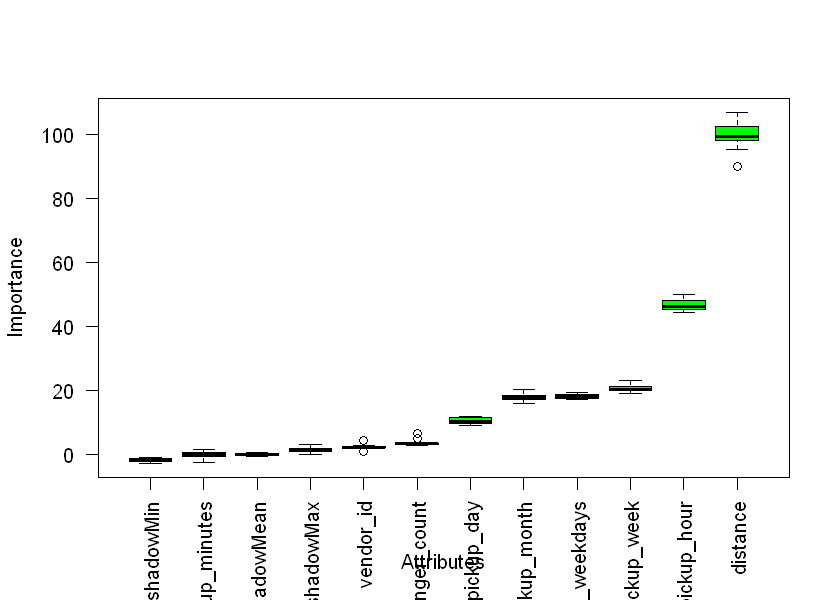

In [47]:
options(repr.plot.width = 7, repr.plot.height = 5)
# print(boruta)
plot(boruta, las=2, cex=1)

In [48]:
## Save clean file 
write.csv(train,"clean_train.csv",row.names = FALSE)
write.csv(test,"clean_test.csv",row.names = FALSE)

## Model Training and Execution

## Naive Bayes

In [49]:
## Training Naive Bayes using Train dataset
model <- naiveBayes(as.factor(trip_duration) ~. , data=train)

# Predicting "trip types" on test dataset using trained model
y_predict <- predict(model, test, type = 'class')
print(head(y_predict))

[1] Short Trip Short Trip Short Trip Short Trip Short Trip Short Trip
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      13162       343
  Long Trip         260       110
                                         
               Accuracy : 0.9565         
                 95% CI : (0.953, 0.9599)
    No Information Rate : 0.9674         
    P-Value [Acc > NIR] : 1.0000000      
                                         
                  Kappa : 0.2452         
                                         
 Mcnemar's Test P-Value : 0.0008399      
                                         
            Sensitivity : 0.9806         
            Specificity : 0.2428         
         Pos Pred Value : 0.9746         
         Neg Pred Value : 0.2973         
             Prevalence : 0.9674         
         Detection Rate : 0.9486         
   Detection Prevalence : 0.9733         
      Balanced Accuracy : 0.6117         
                                         
       'Positive' Class : Short Trip     
   

Area under the curve (AUC): 0.612

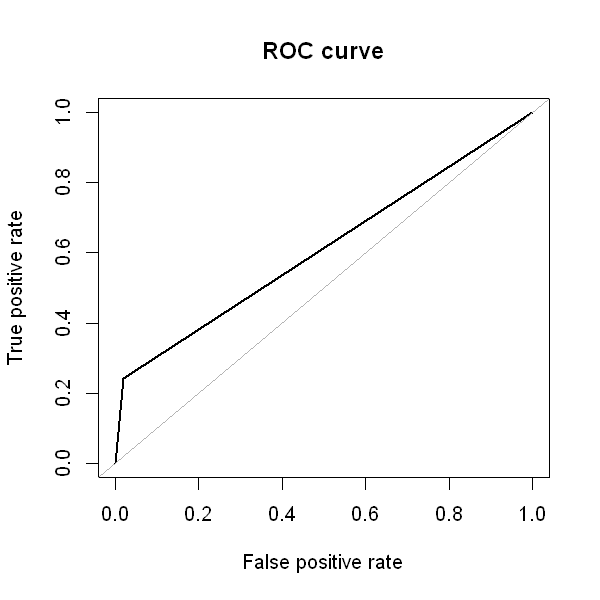

In [50]:
## Confusion matrix
confusionMatrix(y_predict, test$trip_duration, positive = 'Short Trip')

## plot size settings
options(repr.plot.width = 5, repr.plot.height = 5)

## ROC curves - Relationship between Sensitivity and Specificity
roc.curve(test$trip_duration, y_predict, plotit=T)


# Sensitivity = (TP)/(TP+FN) =  43/(43+2625)
# Specificity = (TN)/(TN+FP) = 20/(20+81)

##                      Actual
#                    Short  Long
# Predicted Short    TP     FP
#           Long     FN     TN

# Precision = (TP)/(TP+FP)
# Recall = (TP)/(TP+FN)


In [51]:

6490*2

[1] 12980

In [54]:
32334*2

[1] 64668


Short Trip  Long Trip 
     31252       1035 

Short Trip  Long Trip 
     31252      33416 
[1] Short Trip Short Trip Short Trip Short Trip Long Trip  Short Trip
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      11360       108
  Long Trip        2062       345
                                          
               Accuracy : 0.8436          
                 95% CI : (0.8375, 0.8496)
    No Information Rate : 0.9674          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1971          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8464          
            Specificity : 0.7616          
         Pos Pred Value : 0.9906          
         Neg Pred Value : 0.1433          
             Prevalence : 0.9674          
         Detection Rate : 0.8187          
   Detection Prevalence : 0.8265          
      Balanced Accuracy : 0.8040          
                                          
       'Positive' Class : 

Area under the curve (AUC): 0.804

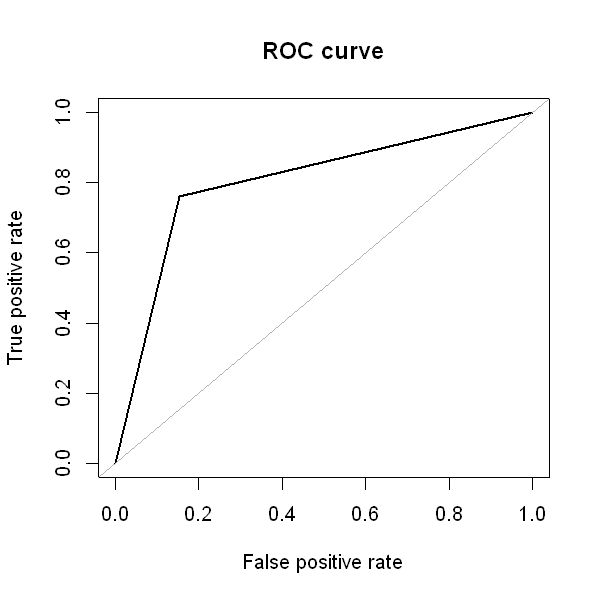

In [55]:

print(table(train$trip_duration))
## oversampling method
over <- ovun.sample(trip_duration ~., data = train, method = "over", N=64668)$data
print(table(over$trip_duration))

# model training
model_over <- naiveBayes(as.factor(trip_duration) ~. , data=over)

# prediction
y_predict_over <- predict(model_over, test, type = 'class')
print(head(y_predict_over))

## Confusion matrix
confusionMatrix(y_predict_over, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_over, plotit=T)

In [56]:
2667*2

[1] 5334


Short Trip  Long Trip 
     31252       1035 

Short Trip  Long Trip 
      4299       1035 
[1] Short Trip Short Trip Short Trip Short Trip Short Trip Short Trip
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      12578       237
  Long Trip         844       216
                                          
               Accuracy : 0.9221          
                 95% CI : (0.9175, 0.9265)
    No Information Rate : 0.9674          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2513          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9371          
            Specificity : 0.4768          
         Pos Pred Value : 0.9815          
         Neg Pred Value : 0.2038          
             Prevalence : 0.9674          
         Detection Rate : 0.9065          
   Detection Prevalence : 0.9236          
      Balanced Accuracy : 0.7070          
                                          
       'Positive' Class : 

Area under the curve (AUC): 0.707

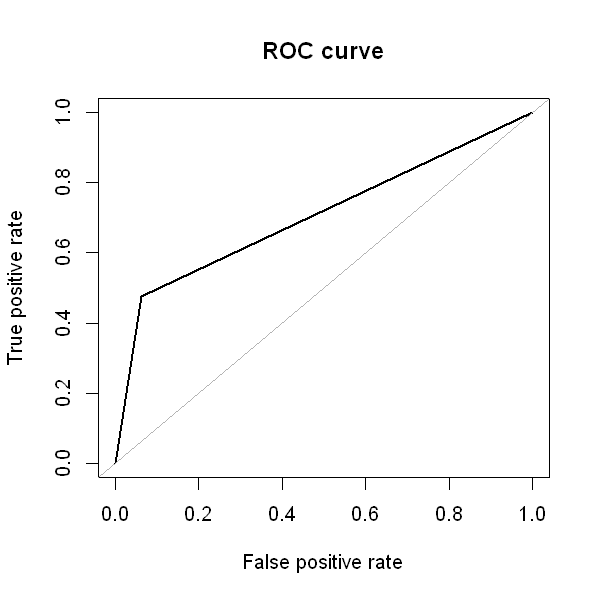

In [57]:
print(table(train$trip_duration))
under <- ovun.sample(trip_duration ~., data = train, method = "under", N=5334)$data
print(table(under$trip_duration))


model_under <- naiveBayes(as.factor(trip_duration) ~. , data=under)
# print(model)

# prediction
y_predict_under <- predict(model_under, test, type = 'class')
print(head(y_predict_under))

## Confusion matrix
confusionMatrix(y_predict_under, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_under, plotit=T)

In [58]:
32334+2667

[1] 35001


Short Trip  Long Trip 
     31252       1035 

Short Trip  Long Trip 
     17524      17477 
[1] Short Trip Short Trip Short Trip Short Trip Long Trip  Short Trip
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      11447       110
  Long Trip        1975       343
                                          
               Accuracy : 0.8497          
                 95% CI : (0.8437, 0.8556)
    No Information Rate : 0.9674          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.2041          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8529          
            Specificity : 0.7572          
         Pos Pred Value : 0.9905          
         Neg Pred Value : 0.1480          
             Prevalence : 0.9674          
         Detection Rate : 0.8250          
   Detection Prevalence : 0.8329          
      Balanced Accuracy : 0.8050          
                                          
       'Positive' Class : 

Area under the curve (AUC): 0.805

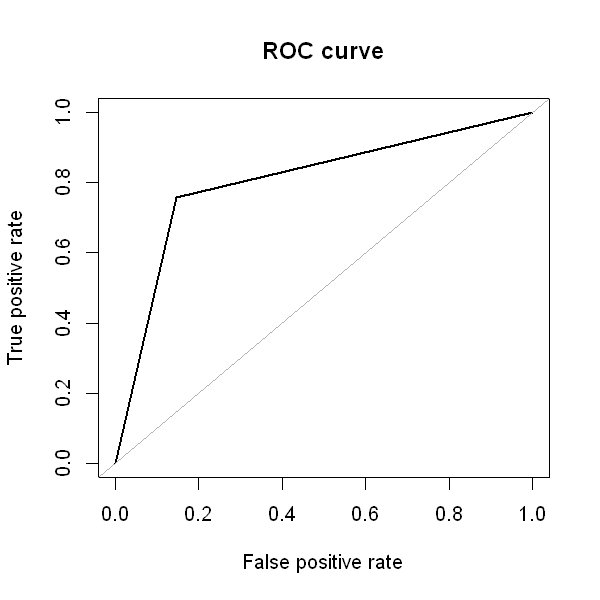

In [59]:
print(table(train$trip_duration))
both <- ovun.sample(trip_duration ~., data = train, method = "both",
                    seed = 222,
                    N=35001)$data
print(table(both$trip_duration))

# model training
model_both <- naiveBayes(as.factor(trip_duration) ~. , data=both)
# print(model)

# prediction
y_predict_both <- predict(model_both, test, type = 'class')
print(head(y_predict_both))

## Confusion matrix
confusionMatrix(y_predict_both, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_both, plotit=T)

## Decision Trees

Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      13422       453
  Long Trip           0         0
                                          
               Accuracy : 0.9674          
                 95% CI : (0.9643, 0.9702)
    No Information Rate : 0.9674          
    P-Value [Acc > NIR] : 0.5125          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.9674          
         Neg Pred Value :    NaN          
             Prevalence : 0.9674          
         Detection Rate : 0.9674          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 

Area under the curve (AUC): 0.500

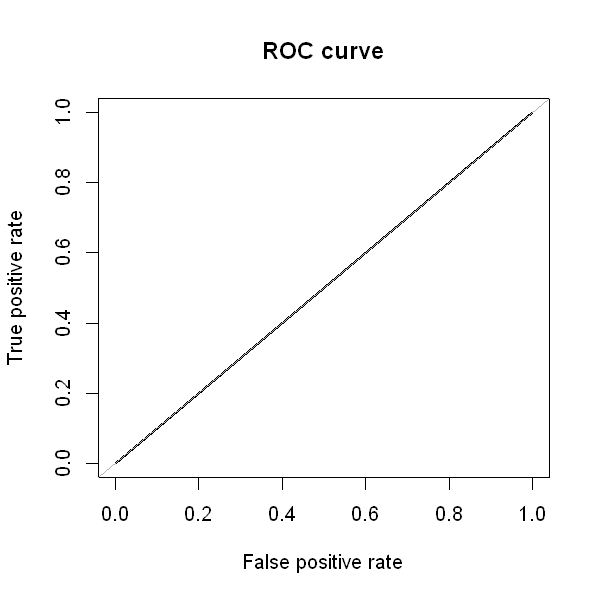

In [60]:
# predictors -- independent variables
predictors <- train[, -which(names(train) %in% c('trip_duration')) ]

# Predicting "trip types" on test dataset using trained model
dt_model <- C5.0.default(x = predictors, y = train$trip_duration)

# prediction 
y_predict_dt <- predict(dt_model, test, type = 'class')
# print(head(y_predict_dt))

## Confusion matrix
confusionMatrix(y_predict_dt, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_dt, plotit=T)

### Decision Tree - over

[1] Short Trip Short Trip Short Trip Short Trip Short Trip Short Trip
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      12777       308
  Long Trip         645       145
                                         
               Accuracy : 0.9313         
                 95% CI : (0.927, 0.9355)
    No Information Rate : 0.9674         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.2001         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.9519         
            Specificity : 0.3201         
         Pos Pred Value : 0.9765         
         Neg Pred Value : 0.1835         
             Prevalence : 0.9674         
         Detection Rate : 0.9209         
   Detection Prevalence : 0.9431         
      Balanced Accuracy : 0.6360         
                                         
       'Positive' Class : Short Trip     
   

Area under the curve (AUC): 0.636

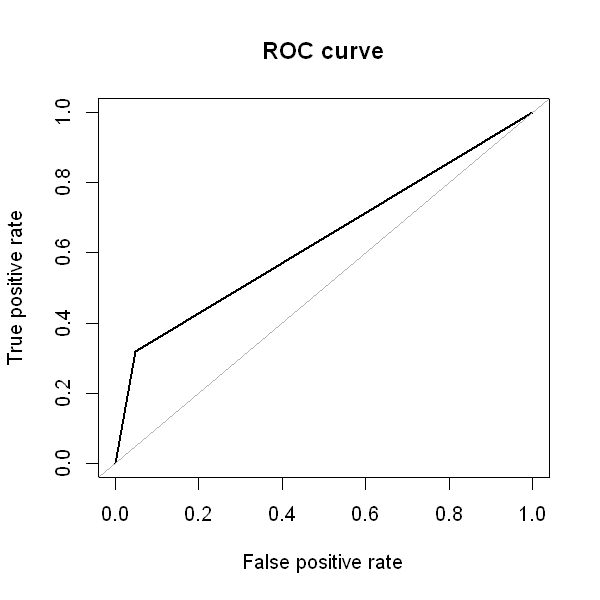

In [61]:
# predictors -- independent variables

# over
predictors_over <- over[, -which(names(over) %in% c('trip_duration')) ]

# Predicting "trip types" on test dataset using trained model
dt_model_over <- C5.0.default(x = predictors_over, y = over$trip_duration)

# prediction 
y_predict_dt_over <- predict(dt_model_over, test, type = 'class')
print(head(y_predict_dt_over))

## Confusion matrix
confusionMatrix(y_predict_dt_over, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_dt_over, plotit=T)


### Decision Tree - down

[1] Short Trip Short Trip Short Trip Short Trip Short Trip Short Trip
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      12449       187
  Long Trip         973       266
                                         
               Accuracy : 0.9164         
                 95% CI : (0.9117, 0.921)
    No Information Rate : 0.9674         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.28           
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.9275         
            Specificity : 0.5872         
         Pos Pred Value : 0.9852         
         Neg Pred Value : 0.2147         
             Prevalence : 0.9674         
         Detection Rate : 0.8972         
   Detection Prevalence : 0.9107         
      Balanced Accuracy : 0.7574         
                                         
       'Positive' Class : Short Trip     
   

Area under the curve (AUC): 0.757

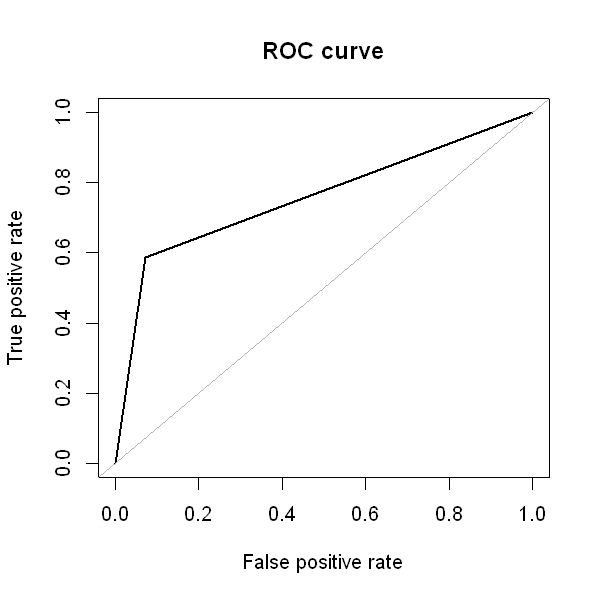

In [62]:
# predictors -- independent variables

# down
predictors_under <- under[, -which(names(under) %in% c('trip_duration')) ]

# Predicting "trip types" on test dataset using trained model
dt_model_under <- C5.0.default(x = predictors_under, y = under$trip_duration)

# prediction 
y_predict_dt_under <- predict(dt_model_under, test, type = 'class')
print(head(y_predict_dt_under))

## Confusion matrix
confusionMatrix(y_predict_dt_under, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_dt_under, plotit=T)

### Decision Tree - Both

[1] Short Trip Short Trip Short Trip Short Trip Long Trip  Short Trip
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      12472       267
  Long Trip         950       186
                                          
               Accuracy : 0.9123          
                 95% CI : (0.9075, 0.9169)
    No Information Rate : 0.9674          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1966          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9292          
            Specificity : 0.4106          
         Pos Pred Value : 0.9790          
         Neg Pred Value : 0.1637          
             Prevalence : 0.9674          
         Detection Rate : 0.8989          
   Detection Prevalence : 0.9181          
      Balanced Accuracy : 0.6699          
                                          
       'Positive' Class : 

Area under the curve (AUC): 0.670

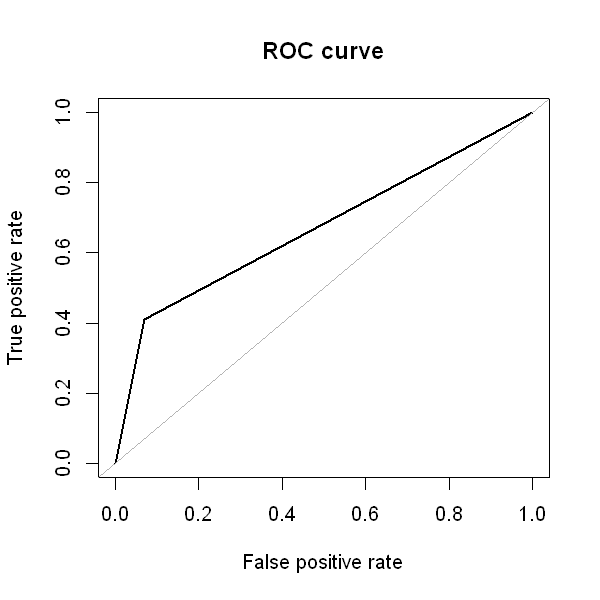

In [63]:
# predictors -- independent variables

# both
predictors_both <- both[, -which(names(both) %in% c('trip_duration')) ]

# Predicting "trip types" on test dataset using trained model
dt_model_both <- C5.0.default(x = predictors_both, y = both$trip_duration)

# prediction 
y_predict_dt_both <- predict(dt_model_both, test, type = 'class')
print(head(y_predict_dt_both))

## Confusion matrix
confusionMatrix(y_predict_dt_both, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_dt_both, plotit=T)

## Neural Network

In [64]:

# # Features creation
# features <- names(train[, -which(names(train) %in% c('trip_duration'))])
# features

# f <- paste(features, collapse=' + ')
# f <- paste('trip_duration ~', f)
# f

# # Convert to formula
# f <- as.formula(f)
# f

# nn <- neuralnet(f, train, hidden = 5, linear.output = FALSE )


In [65]:
# # install.packages('plyr')
# library(plyr)

In [66]:
# # Compute Predictions off Test Set
# predicted <- compute(nn, test[,-3])

# # Check out net.result
# # head(predicted$net.result)

# predicted$net.result <- sapply(predicted$net.result, round, digits = 0)
# # head(predicted$net.result)

# evaluation <- data.frame(test$trip_duration, predicted$net.result)
# # head(evaluation)
# colnames(evaluation) <- c("actual", "predict")
# head(evaluation)

# evaluation$predict <- mapvalues(evaluation$predict, c(0, 1), c("Short Trip", "Long Trip"))
# evaluation$predict <- as.factor(evaluation$predict)
# head(evaluation)
# table(evaluation$actual, evaluation$predict)

# # Confusion matrix
# confusionMatrix(evaluation$predict, evaluation$actual, positive = 'Short Trip')

# # # ROC curve
# # options(repr.plot.width = 5, repr.plot.height = 5)
# # roc.curve(test$trip_duration, predicted$net.result, plotit=T)

In [67]:
# # Features creation
# features_over <- names(over[, -which(names(over) %in% c('trip_duration'))])
# features_over

# f_over <- paste(features_over, collapse=' + ')
# f_over <- paste('trip_duration ~', f_over)
# f_over

# # Convert to formula
# f_over <- as.formula(f_over)
# f_over

# nn <- neuralnet(f_over, over, hidden = 5, linear.output = FALSE )

## SVM

In [68]:
set.seed(123)

In [69]:
library(e1071)

         1          2          3          4          5          6 
Short Trip Short Trip Short Trip Short Trip Short Trip Short Trip 
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      13422       453
  Long Trip           0         0
                                          
               Accuracy : 0.9674          
                 95% CI : (0.9643, 0.9702)
    No Information Rate : 0.9674          
    P-Value [Acc > NIR] : 0.5125          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.0000          
            Specificity : 0.0000          
         Pos Pred Value : 0.9674          
         Neg Pred Value :    NaN          
             Prevalence : 0.9674          
         Detection Rate : 0.9674          
   Detection Prevalence : 1.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 

Area under the curve (AUC): 0.500

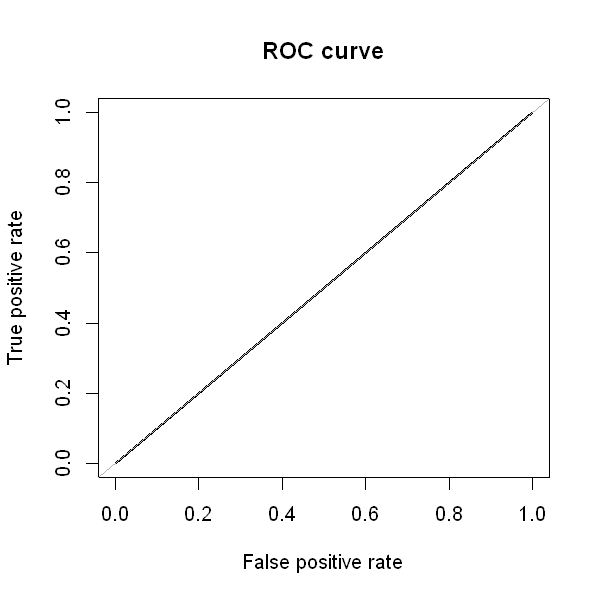

In [70]:
## Build model – linear kernel and C-classification (soft margin) 
# with default cost (C=1), all default settings.
svm_model <- svm(trip_duration ~ ., data=train, method="C-classification", 
                 kernel="radial")

# prediction 
y_predict_svm <- predict(svm_model, test, type = 'class')
print(head(y_predict_svm))

## Confusion matrix
confusionMatrix(y_predict_svm, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_svm, plotit=T)

### SVM - over

         1          2          3          4          5          6 
Short Trip Short Trip Short Trip Short Trip Short Trip Short Trip 
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      11570       129
  Long Trip        1852       324
                                         
               Accuracy : 0.8572         
                 95% CI : (0.8513, 0.863)
    No Information Rate : 0.9674         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.2034         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.8620         
            Specificity : 0.7152         
         Pos Pred Value : 0.9890         
         Neg Pred Value : 0.1489         
             Prevalence : 0.9674         
         Detection Rate : 0.8339         
   Detection Prevalence : 0.8432         
      Balanced Accuracy : 0.7886         
                                         
       'Positive' Class : Short Trip     
   

Area under the curve (AUC): 0.789

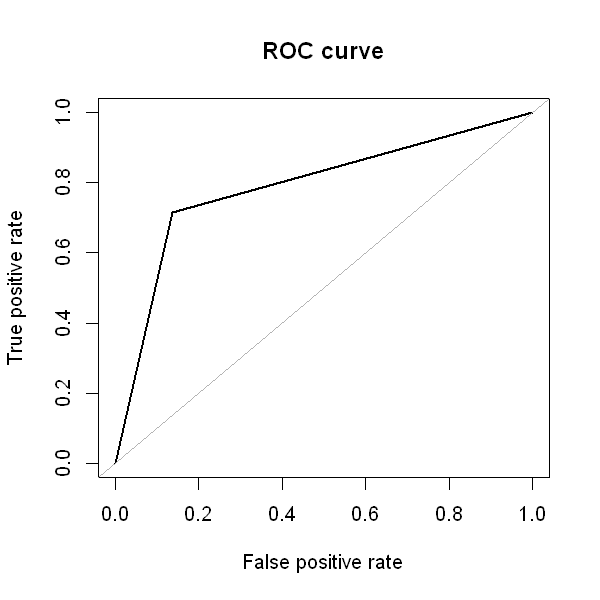

In [71]:
## Build model – linear kernel and C-classification (soft margin) 
# with default cost (C=1), all default settings.
svm_model_over <- svm(trip_duration ~ ., data=over, method="C-classification", 
                      kernel="radial")

# prediction 
y_predict_svm_over <- predict(svm_model_over, test, type = 'class')
print(head(y_predict_svm_over))

## Confusion matrix
confusionMatrix(y_predict_svm_over, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_svm_over, plotit=T)

## SVM - under

         1          2          3          4          5          6 
Short Trip Short Trip Short Trip Short Trip Short Trip Short Trip 
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      12857       242
  Long Trip         565       211
                                          
               Accuracy : 0.9418          
                 95% CI : (0.9378, 0.9457)
    No Information Rate : 0.9674          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3151          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9579          
            Specificity : 0.4658          
         Pos Pred Value : 0.9815          
         Neg Pred Value : 0.2719          
             Prevalence : 0.9674          
         Detection Rate : 0.9266          
   Detection Prevalence : 0.9441          
      Balanced Accuracy : 0.7118          
                                          
       'Positive' Class : 

Area under the curve (AUC): 0.712

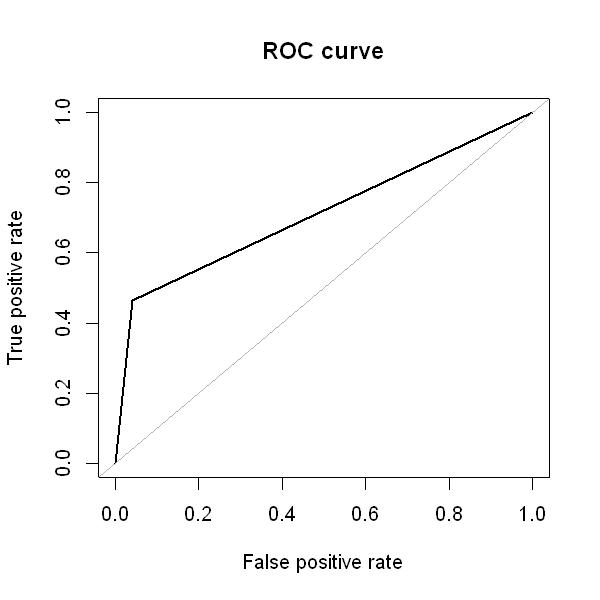

In [72]:
## Build model – linear kernel and C-classification (soft margin) 
# with default cost (C=1), all default settings.
svm_model_under <- svm(trip_duration ~ ., data=under, method="C-classification", 
                      kernel="radial")

# prediction 
y_predict_svm_under <- predict(svm_model_under, test, type = 'class')
print(head(y_predict_svm_under))

## Confusion matrix
confusionMatrix(y_predict_svm_under, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_svm_under, plotit=T)

## SVM - Both

         1          2          3          4          5          6 
Short Trip Short Trip Short Trip Short Trip Short Trip Short Trip 
Levels: Short Trip Long Trip


Confusion Matrix and Statistics

            Reference
Prediction   Short Trip Long Trip
  Short Trip      11602       123
  Long Trip        1820       330
                                          
               Accuracy : 0.86            
                 95% CI : (0.8541, 0.8657)
    No Information Rate : 0.9674          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.211           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8644          
            Specificity : 0.7285          
         Pos Pred Value : 0.9895          
         Neg Pred Value : 0.1535          
             Prevalence : 0.9674          
         Detection Rate : 0.8362          
   Detection Prevalence : 0.8450          
      Balanced Accuracy : 0.7964          
                                          
       'Positive' Class : 

Area under the curve (AUC): 0.796

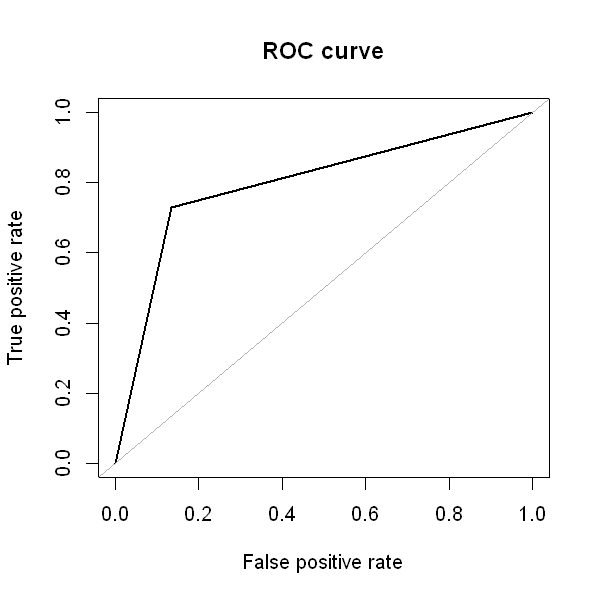

In [73]:
## Build model – linear kernel and C-classification (soft margin) 
# with default cost (C=1), all default settings.
svm_model_both <- svm(trip_duration ~ ., data=both, method="C-classification", 
                      kernel="radial")

# prediction 
y_predict_svm_both <- predict(svm_model_both, test, type = 'class')
print(head(y_predict_svm_both))

## Confusion matrix
confusionMatrix(y_predict_svm_both, test$trip_duration, positive = 'Short Trip')

# ROC curve
options(repr.plot.width = 5, repr.plot.height = 5)
roc.curve(test$trip_duration, y_predict_svm_both, plotit=T)